In [1]:
import gizeh
import numpy as np

from math import pi, sin, cos, acos, radians


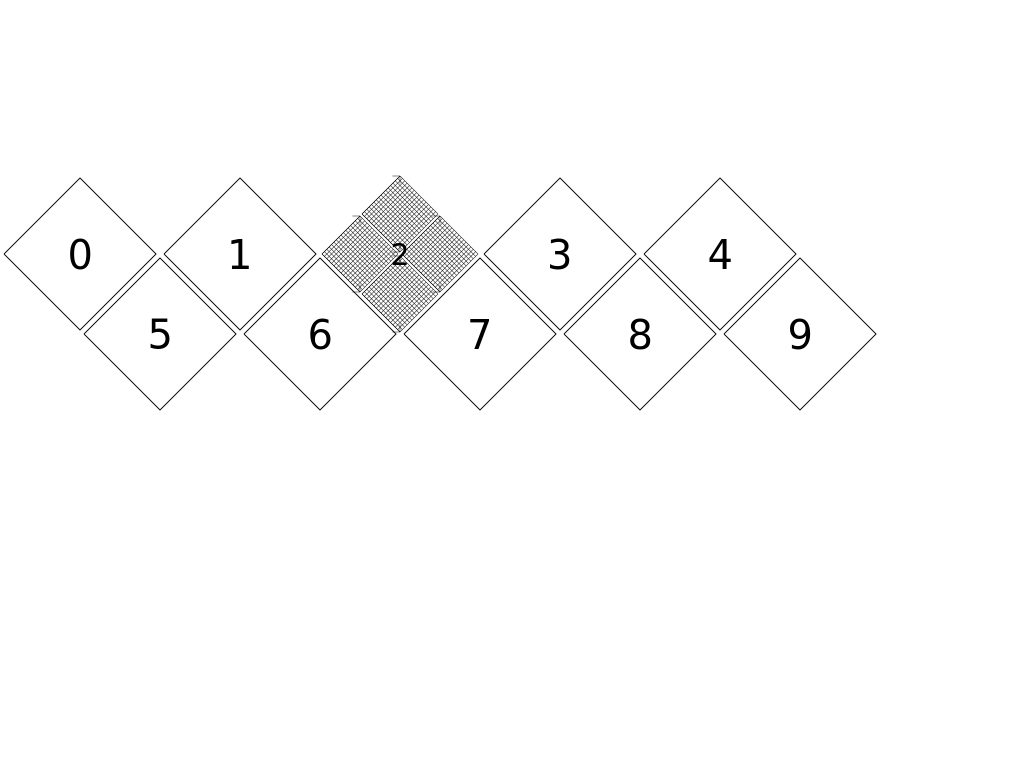

In [2]:
surface = gizeh.Surface(width=1024, height=768) # in pixels

basis = np.array([[80.0,80.0],[80.0,-80.0]])

rhomb_coords = np.array([[0.0,0.0],
                        [0.0,1.0],
                        [1.0,1.0],
                        [1.0,0.0],
                        [0.0,0.0]])

rhomb_coords = rhomb_coords - np.array([0.5,0.5])
rhomb_t = np.matmul( basis, rhomb_coords.T ).T

rhomb = gizeh.polyline( rhomb_t, stroke_width = 1, stroke=(0,0,0) )

def arrow(from_vec, to_vec):
    frm = np.array(from_vec)
    to = np.array(to_vec)

    
    
    v = to - frm
    p = np.array([-v[1], v[0]])
    b = frm + 0.9*v
    
    base = gizeh.polyline( [frm,to], stroke_width = 1, stroke=(0,0,0) )
    
    p1 = b + 0.1*p
    h1 = gizeh.polyline( [to,p1], stroke_width = 1, stroke=(0,0,0) )
    p2 = b - 0.1*p
    h2 = gizeh.polyline( [to,p2], stroke_width = 1, stroke=(0,0,0) )
    
    return gizeh.Group([base, h1, h2])

def grid(basis):
    
    gr = []
    for i in range(16+1):       
        p1 = i/16.0*basis[0] - 0.5*basis[1] - 0.5*basis[0]
        p2 = i/16.0*basis[0] + 0.5*basis[1] - 0.5*basis[0]
        
        l = gizeh.polyline( [p1,p2], stroke_width = 1, stroke=(0,0,0) )
        gr.append(l)
            
        p1 = i/16.0*basis[1] - 0.5*basis[0] - 0.5*basis[1]
        p2 = i/16.0*basis[1] + 0.5*basis[0] - 0.5*basis[1]
        l = gizeh.polyline( [p1,p2], stroke_width = 1, stroke=(0,0,0) )
        gr.append(l)
    
    o = 0.5*(-basis[0]-basis[1])
    xp1 = basis[0]
    xp2 = basis[1]
    a1 = arrow(o, o+xp1)
    a2 = arrow(o, o+xp2)
    g = gizeh.Group(gr + [a1,a2])
    return g
    
#grd = grid(basis)
#grd = grd.scale(0.95)
#grd = grd.translate(xy=[512,334])
#grd.draw(surface)


#rhomb_1 = rhomb.translate(xy=[512,334])

rhombis = []
rhombi_num = []
idx = 0
for i in range(5):
    
    
    if idx == 2:
        grd1 = grid(basis)
        grd1 = grd1.scale(0.5*0.95)
        grd1 = grd1.translate(xy=0.25*basis[0] + 0.25*basis[1])
        
        grd2 = grid(basis)
        grd2 = grd2.scale(0.5*0.95)
        grd2 = grd2.translate(xy=0.25*basis[0]-0.25*basis[1])
        
        grd3 = grid(basis)
        grd3 = grd3.scale(0.5*0.95)
        grd3 = grd3.translate(xy=-0.25*basis[0]+0.25*basis[1])
        
        grd4 = grid(basis)
        grd4 = grd4.scale(0.5*0.95)
        grd4 = grd4.translate(xy=-0.25*basis[0]-0.25*basis[1])
            
        n = gizeh.text(str(idx),fontfamily="Impact", fontsize=30)
        grid_group = gizeh.Group([grd1, grd2, grd3, grd4,n ])
        grid_group = grid_group.translate(xy=basis[1] + i*(basis[0]+basis[1]))
        
        
        
        rhombis.append(grid_group)
    else:
        r = rhomb.scale(0.95)
    
        n = gizeh.text(str(idx),fontfamily="Impact", fontsize=40)
        g = gizeh.Group([n,r])
        g = g.translate(xy=basis[1] + i*(basis[0]+basis[1]))
        rhombis.append(g)
        
    idx += 1
    
for i in range(5):
   
    r = rhomb.scale(0.95)
    n = gizeh.text(str(idx),fontfamily="Impact",  fontsize=40)
    g = gizeh.Group([n,r])
    g = g.translate(xy=basis[0]+basis[1] + i*(basis[0]+basis[1]))
    rhombis.append(g)
    idx += 1
    
    
g = gizeh.Group(rhombis +rhombi_num)
g = g.translate(xy=[0,334])
g.draw(surface)
#rhomb_1.draw(surface)
surface.write_to_png("mesh_rhombi.png")

surface.ipython_display()

In [3]:
def make_rhomb_angle(coord, numbers, angles_names, axs):
    ax1 = gizeh.polyline( [[-2.0*axs,0], [2.0*axs,0]], stroke_width = 1, stroke=(0,0,0) )
    ax2 = gizeh.polyline( [[0,-2.0*axs], [0,2.0*axs]], stroke_width = 1, stroke=(0,0,0) )
    circle = gizeh.circle(xy=[0,0], r=axs,stroke_width = 1, stroke=(0,0,0) )
    polygon = gizeh.polyline(axs*coord, stroke_width = 1, stroke=(0,0,0), close_path=True )

    p = [polygon]

    for i in range(coord.shape[0]):
        cx = coord[i]*axs*1.5
        rx = coord[i]*axs*1.2
        d = 0.1
        ax = gizeh.polyline( [[0,0], cx], stroke_width = 1, stroke=(0,0,0) )
        n = gizeh.text(numbers[i],fontfamily="Impact",  fontsize=10)
        n = n.translate(xy=rx+[axs*d,axs*d])
                        
        a = gizeh.text(angles_names[i],fontfamily="Impact",  fontsize=10)
        a = a.translate(xy=rx+[axs*d,-axs*d])    
        p += [ax,n,a]

    g = gizeh.Group([ax1,ax2,circle] + p)
    return g

    




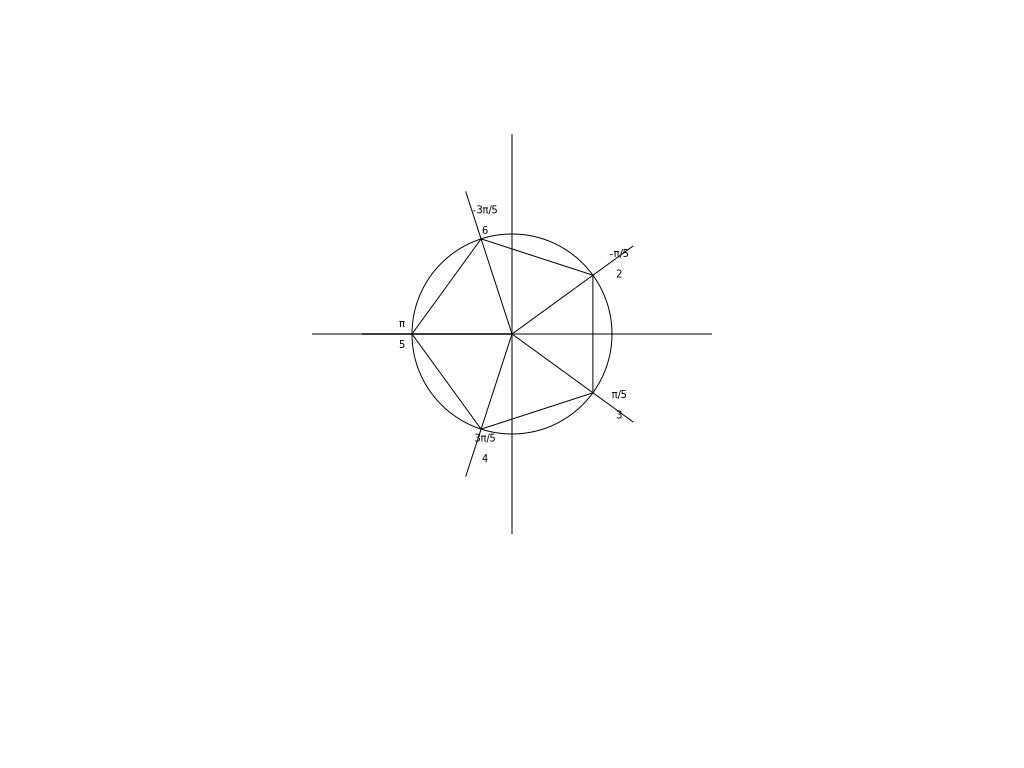

In [4]:
angles_t = np.array([-pi/5, pi/5, 3*pi/5, pi, -3*pi/5])
coord_t = np.stack((np.cos(angles_t), np.sin(angles_t) ), axis=-1)
numbers_t = ["2", "3", "4", "5", "6"]
angles_names_t = ["-π/5", "π/5", "3π/5", "π", "-3π/5"]
axs= 100



surface2 = gizeh.Surface(width=1024, height=768) # in pixels

g = make_rhomb_angle(coord_t, numbers_t, angles_names_t, axs)
g = g.translate(xy=[512,334])
g.draw(surface2)

surface2.write_to_png("rhomb_circle_top.png")
surface2.ipython_display()


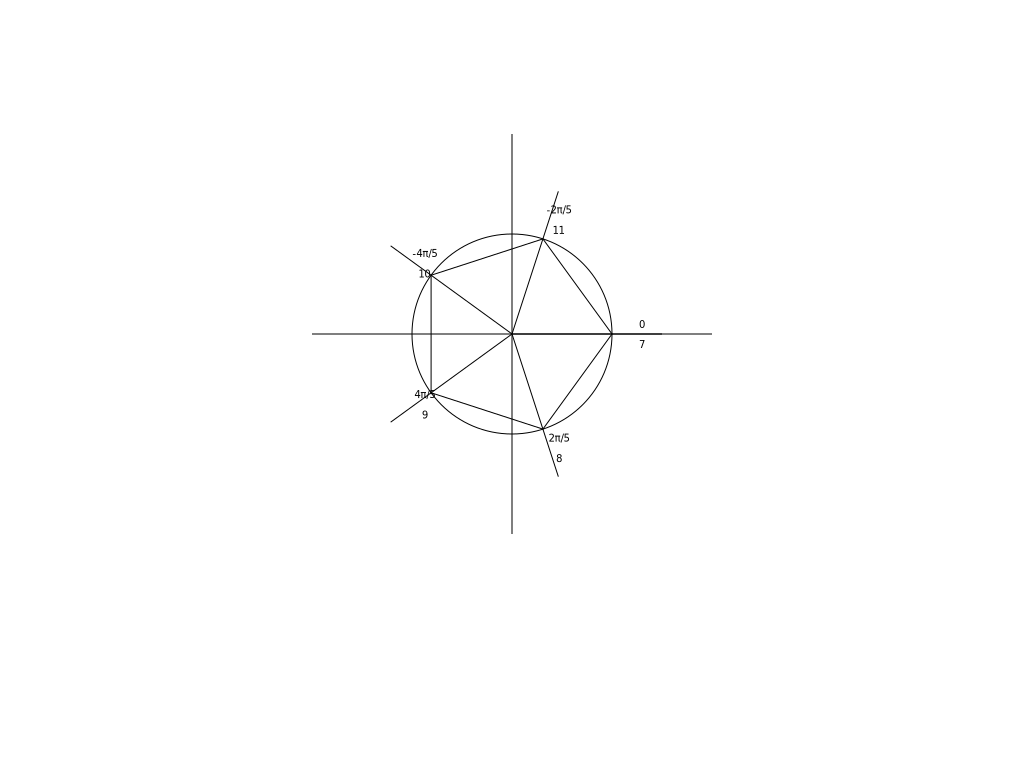

In [5]:
angles_b = np.array([0.0, 2*pi/5, 4*pi/5, -4*pi/5, -2*pi/5])
coord_b = np.stack((np.cos(angles_b), np.sin(angles_b) ), axis=-1)
numbers_b = ["7", "8", "9", "10", "11"]
angles_names_b = ["0", "2π/5", "4π/5", "-4π/5", "-2π/5"]
axs= 100


surface3 = gizeh.Surface(width=1024, height=768) # in pixels

g = make_rhomb_angle(coord_b, numbers_b, angles_names_b, axs)
g = g.translate(xy=[512,334])
g.draw(surface3)

surface3.write_to_png("rhomb_circle_bottom.png")

surface3.ipython_display()

In [6]:
coord_t.shape
l_t*np.ones((5,1))

NameError: name 'l_t' is not defined

In [7]:
w = 2.0 * acos(1.0 / (2.0 * sin(pi / 5.0)));


north = np.array([[0.0, 0.0, 1.0]])
south = np.array([[0.0, 0.0, -1.0]])

                           
l_t = sin(pi / 2.0 - w)
coord3_t = np.concatenate( (coord_t, l_t*np.ones((5,1)) ), axis=1 )

l_b = sin(w - pi / 2.0)
coord3_b = np.concatenate( (coord_b, l_b*np.ones((5,1)) ), axis=1 )

rh = np.concatenate((north, south, coord3_t, coord3_b), axis=0)

edges = [[0,2],
         [0,3],
         [0,4],
         [0,5],
         [0,6],
         [2,3],
         [3,4],
         [4,5],
         [5,6],
         [6,2],
         [2,7],
         [7,3],
         [3,8],
         [8,4],
         [4,9],
         [9,5],
         [5,10],
         [10,6],
         [6,11],
         [11,2],
         [7,8],
         [8,9],
         [9,10],
         [10,11],
         [11,7],
         [1,7],
         [1,8],
         [1,9],
         [1,10],
         [1,11]]

In [8]:
def draw_rhomb(coords, edges, scale):
    lines = []
    c = coords[:,0:2]
    o = scale*np.array([0.1,0.1])
    for e in edges:
        l = gizeh.polyline( [scale*c[e[0]], scale*c[e[1]]], stroke_width = 1, stroke=(0,0,0) )
        lines.append(l)
    for i in range(12):
        a = gizeh.text(str(i),fontfamily="Impact",  fontsize=15, fill = (1.0,0,0))
        a = a.translate( scale*coords[i][0:2] + o )
        lines.append(a)
    return gizeh.Group(lines)


def rotX(theta):
    return np.array([[1.0, 0.0, 0.0], [0.0, cos(theta), -sin(theta)], [0.0, sin(theta), cos(theta)]])

def rotZ(theta):
    return np.array([[cos(theta), -sin(theta), 0.0], [sin(theta), cos(theta), 0.0], [0.0, 0.0, 1.0]])

def rotY(theta):
    return np.array([[cos(theta), 0.0, sin(theta)], [0.0, 1.0, 0.0], [-sin(theta), 0.0, cos(theta)]])


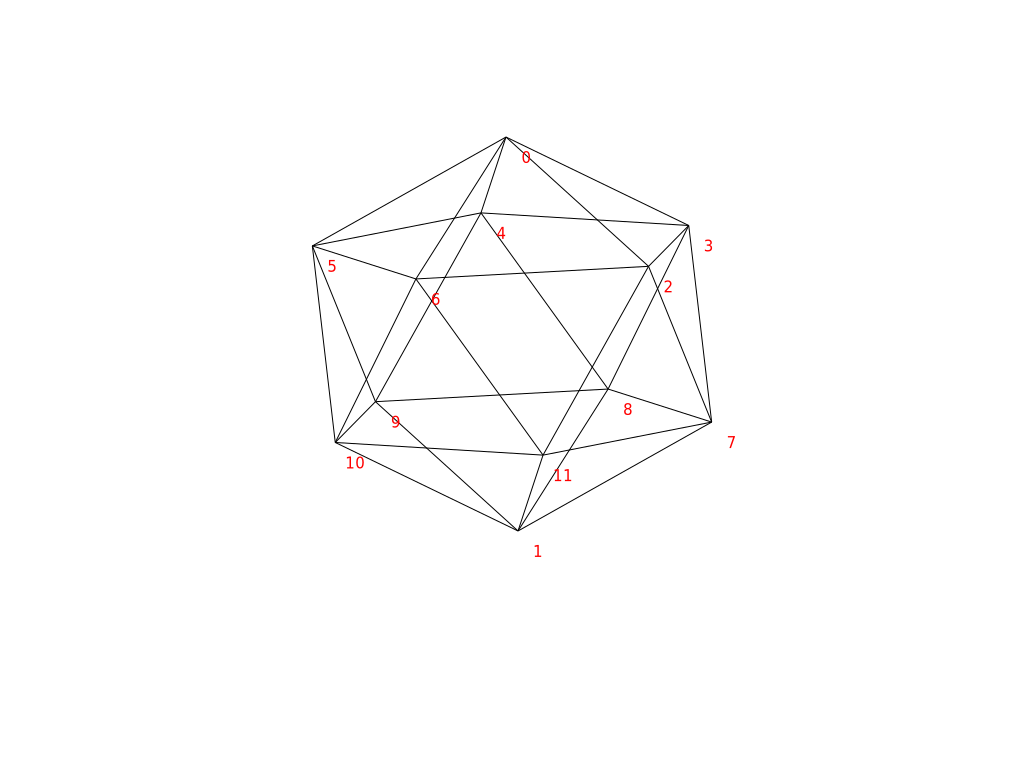

In [9]:
surface4 = gizeh.Surface(width=1024, height=768) # in pixels

rh2 = (rotY(radians(10))@rotX(radians(10))@rotZ(radians(0))@rotX(radians(90))@rh.T).T

r = draw_rhomb(rh2, edges, 200)
r = r.translate(xy=[512,334])
r.draw(surface4)

surface4.write_to_png("rhomb_3d.png")
surface4.ipython_display()